In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [3]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [45]:
dataset_train.head(20)

,Date,Open,High,Low,Close,Volume,Year
0,2012-01-03,325.25,332.83,324.97,663.59,"7,380,500",2012
1,2012-01-04,331.27,333.87,329.08,666.45,"5,749,400",2012
2,2012-01-05,329.83,330.75,326.89,657.21,"6,590,300",2012
3,2012-01-06,328.34,328.77,323.68,648.24,"5,405,900",2012
4,2012-01-09,322.04,322.29,309.46,620.76,"11,688,800",2012
5,2012-01-10,313.70,315.72,307.30,621.43,"8,824,000",2012
6,2012-01-11,310.59,313.52,309.40,624.25,"4,817,800",2012
7,2012-01-12,314.43,315.26,312.08,627.92,"3,764,400",2012
8,2012-01-13,311.96,312.30,309.37,623.28,"4,631,800",2012
9,2012-01-17,314.81,314.81,311.67,626.86,"3,832,800",2012


In [30]:
dataset_train['Date'] = pd.to_datetime(dataset_train['Date'])

In [31]:
date = dataset_train['Date']
dataset_train['Date'].head()

0   2012-01-03
1   2012-01-04
2   2012-01-05
3   2012-01-06
4   2012-01-09
Name: Date, dtype: datetime64[ns]

In [4]:
training_set = dataset_train.iloc[:, 1: 2].values

In [5]:
training_set.shape


(1258, 1)

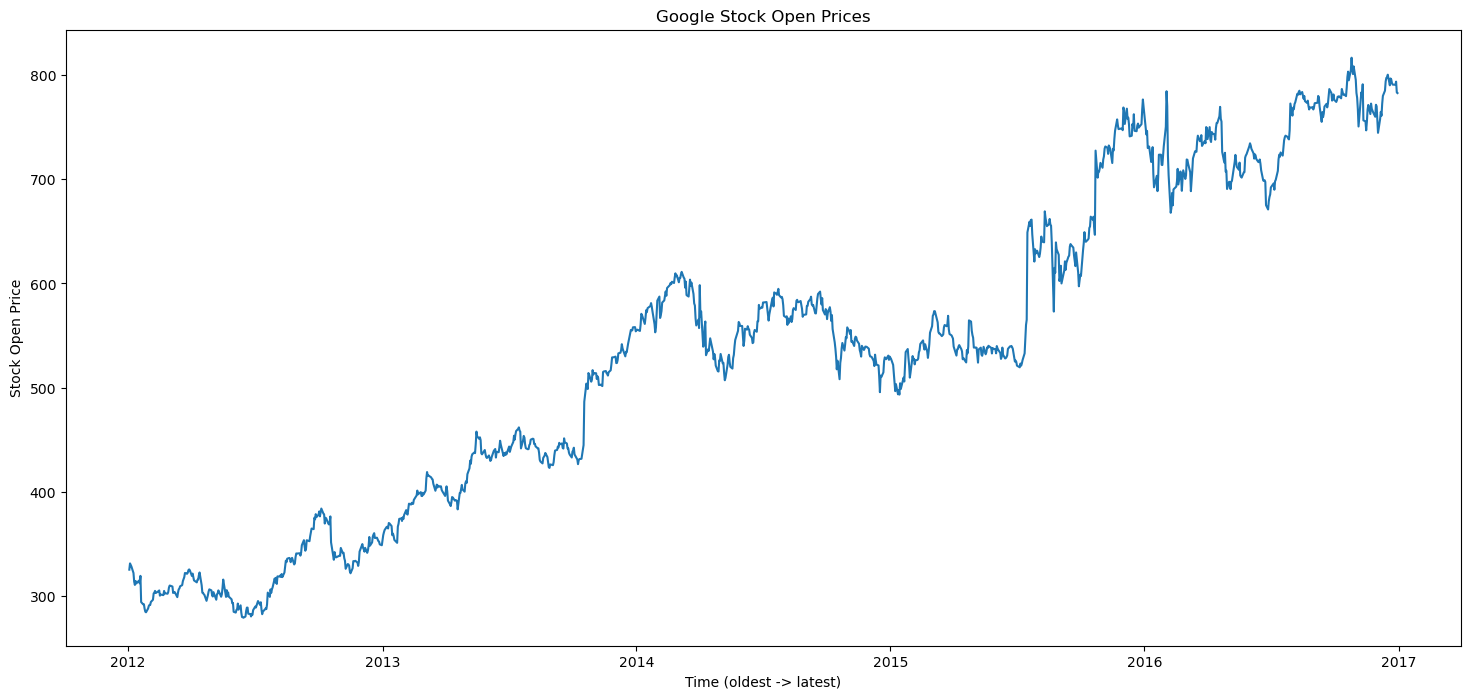

In [34]:
plt.figure(figsize=(18, 8))
plt.plot(dataset_train['Date'],dataset_train['Open'])
plt.title("Google Stock Open Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Open Price")
plt.show()

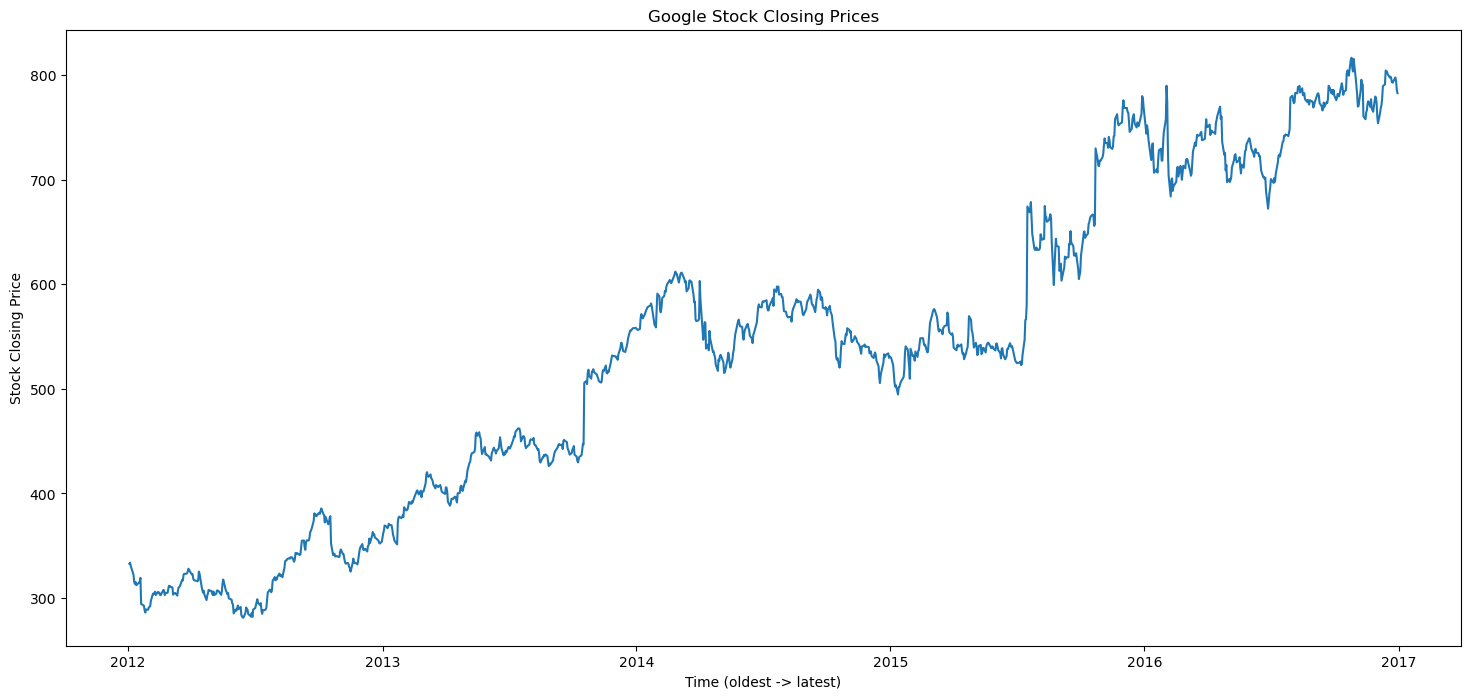

In [42]:
plt.figure(figsize=(18, 8))
plt.plot(dataset_train['Date'],dataset_train['High'])
plt.title("Google Stock Closing Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Closing Price")
plt.show()

In [43]:
# Extract year from the 'Date' column
dataset_train['Year'] = dataset_train['Date'].dt.year


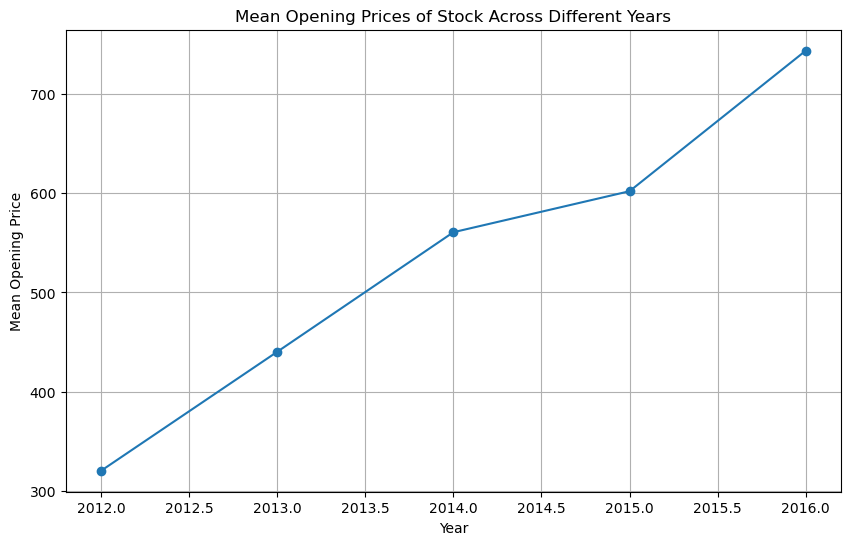

In [46]:
# Calculate the daily range (High - Low) for each day
dataset_train['Daily_Range'] = dataset_train['High'] - dataset_train['Low']

# Calculate the variance of the daily range
daily_range_variance = dataset_train['Daily_Range'].var()

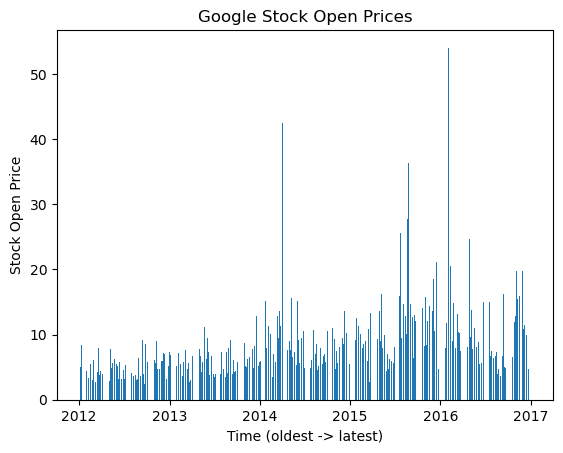

In [48]:
plt.bar(dataset_train['Date'],dataset_train['Daily_Range'])
plt.title("Google Stock Open Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Open Price")
plt.show()

In [7]:
import os
if os.path.exists('config.py'):
    print(1)
else:
    print(0)

0


In [7]:
sc = MinMaxScaler()
#fit: get min/max of train data
training_set_scaled = sc.fit_transform(training_set)

In [8]:
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60: i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [9]:
X_train.shape

(1198, 60)

In [10]:
y_train.shape

(1198,)

In [11]:
X_train = np.reshape(X_train, newshape = 
                     (X_train.shape[0], X_train.shape[1], 1))

In [12]:
X_train.shape

(1198, 60, 1)

In [13]:
regressor = Sequential()
#add 1st lstm layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(rate = 0.2))

##add 2nd lstm layer: 50 neurons
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

##add 3rd lstm layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

##add 4th lstm layer
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(rate = 0.2))

##add output layer
regressor.add(Dense(units = 1))

C:\Users\HP\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [15]:
regressor.fit(x = X_train, y = y_train, batch_size = 32, epochs = 100)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - loss: 0.0990
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.0080
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 0.0052
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - loss: 0.0049
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - loss: 0.0047
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - loss: 0.0040
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - loss: 0.0045
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - loss: 0.0050
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - loss: 0.0044
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - loss: 0.0045
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - loss: 0.0043
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.0044
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - loss: 0.0038
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - loss: 0.0043
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/s

In [16]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')

In [17]:
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [18]:
real_stock_price = dataset_test.iloc[:, 1: 2].values
real_stock_price.shape

(20, 1)

In [ ]:
len()

In [19]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), 
                          axis = 0)
##use .values to make numpy array
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [23]:
inputs = inputs.reshape(-1, 1)

#scale input
inputs = sc.transform(inputs)

In [24]:
len(inputs)

80

In [25]:
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
#add dimension of indicator
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [26]:
X_test.shape

(20, 60, 1)

In [27]:
predicted_stock_price = regressor.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step


In [28]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [35]:
dataset_test['Date'] = pd.to_datetime(dataset_test['Date'])


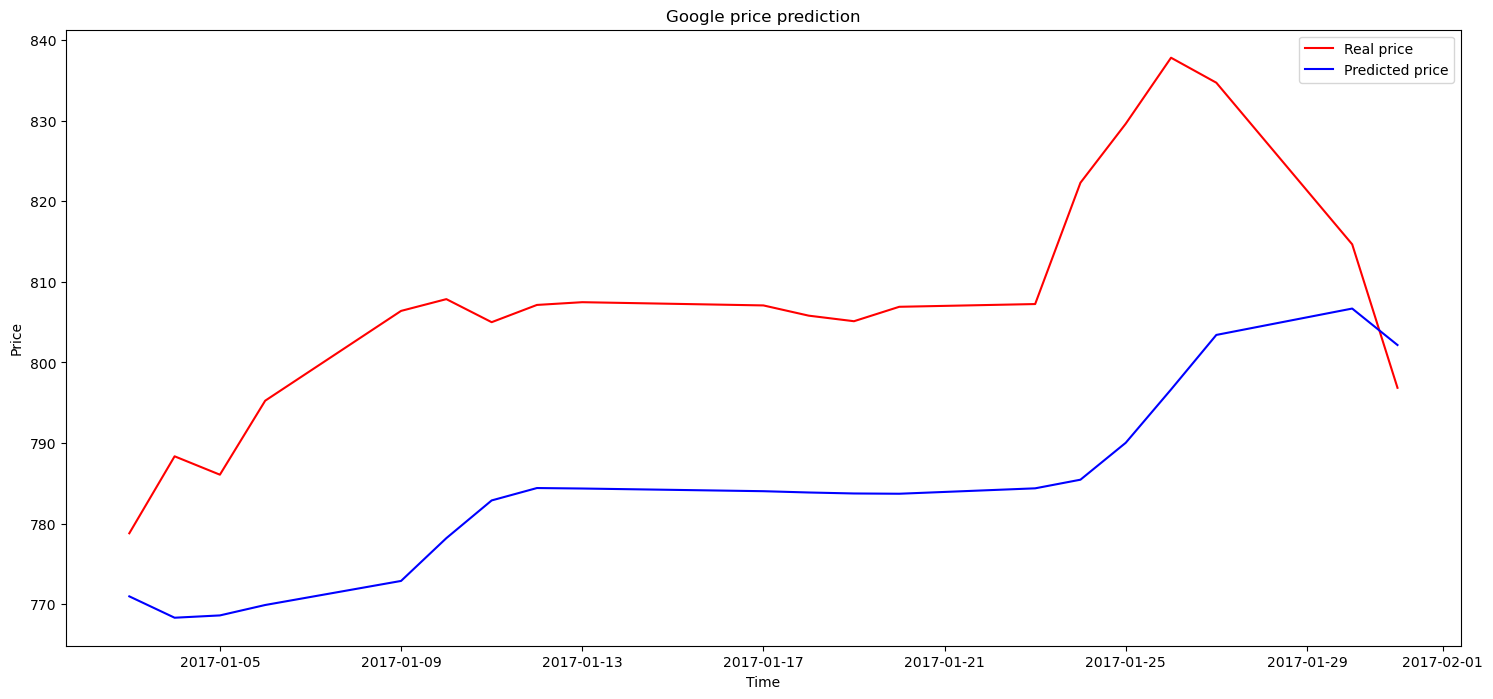

In [39]:
plt.figure(figsize=(18, 8))
plt.plot(dataset_test['Date'],real_stock_price, color = 'red', label = 'Real price')
plt.plot(dataset_test['Date'],predicted_stock_price, color = 'blue', label = 'Predicted price')

plt.title('Google price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()